In [171]:
import pandas as pd
import os
import matplotlib
import math

# File path for jsonl data
file_path1 = os.path.join(os.path.dirname(os.getcwd()),"data\\covid19_partition_1.2020-06-01_00.jsonl")
save_path = os.path.join(os.path.dirname(os.getcwd()),"data\\cleaned_data.json")
save_path_english = os.path.join(os.path.dirname(os.getcwd()),"data\\cleaned_data_en.json")

In [172]:
# conveting json to DataFrame
part1 = pd.read_json(os.path.join(os.path.dirname(os.getcwd()),"data\\covid19_partition_1.2020-06-01_00.jsonl"),lines=True)
part2 = pd.read_json(os.path.join(os.path.dirname(os.getcwd()),"data\\covid19_partition_2.2020-06-01_00.jsonl"),lines=True)
part3 = pd.read_json(os.path.join(os.path.dirname(os.getcwd()),"data\\covid19_partition_3.2020-06-01_00.jsonl"),lines=True)
part4 = pd.read_json(os.path.join(os.path.dirname(os.getcwd()),"data\\covid19_partition_4.2020-06-01_00.jsonl"),lines=True)
merged = [part1, part2, part3, part4]
twitterdf = pd.concat(merged)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342855 entries, 0 to 342854
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             342855 non-null  int64 
 1   text           342855 non-null  object
 2   retweet_count  342855 non-null  int64 
 3   lang           342855 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.5+ MB
None
                    id                                               text  \
0  1266414710573973505  Donald Trump called Mexicans “rapists” &amp; “...   
1  1264535285964001280  西村康稔コロナ担当大臣がよくテレビに出る。私は、この人間が数年前とはいえ、ベトナムで一度に３...   
2  1267236764520833025  These motherfuckers went from “wearing a mask ...   
3  1267128761658437633  They can't give you money to survive a pandemi...   
4  1253450011947470848  Cumpa, sabes quien en plena pandemia está llev...   

   retweet_count lang  
0         145008   en  
1           8385   ja  
2           2958   en  
3          

<AxesSubplot:>

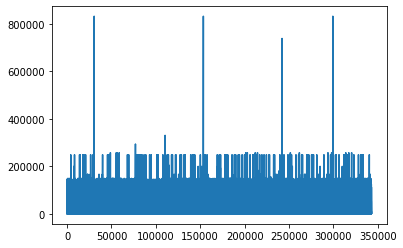

In [173]:
# extract retweeted data
retweeted = twitterdf["retweeted_status"].dropna()
retweeted_status = pd.DataFrame(retweeted.values.tolist(), columns=["id", "text", "retweet_count", "lang"])
print(retweeted_status.info())
print(retweeted_status.head())
retweeted_status["retweet_count"].plot()

In [174]:
# calculating threshold for virality using 84.1% as threshold  
count_mean = retweeted_status["retweet_count"].mean()
count_std = (retweeted_status["retweet_count"].std())
threshold = count_mean + count_std
print(threshold)
print(retweeted_status["retweet_count"][1])

37352.73411306413
8385


In [175]:
# using threshold to generate virality column
retweeted_status["viral"] = int()
retweeted_status["viral"][retweeted_status["retweet_count"] > threshold] = 1
retweeted_status["viral"][retweeted_status["retweet_count"] < threshold] = 0
print(retweeted_status["viral"])

0         1
1         0
2         0
3         0
4         0
         ..
342850    1
342851    1
342852    0
342853    0
342854    0
Name: viral, Length: 342855, dtype: int64


C:\Users\yshet\AppData\Local\Temp\ipykernel_2304\118328893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweeted_status["viral"][retweeted_status["retweet_count"] > threshold] = 1
C:\Users\yshet\AppData\Local\Temp\ipykernel_2304\118328893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweeted_status["viral"][retweeted_status["retweet_count"] < threshold] = 0


In [176]:
retweeted_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342855 entries, 0 to 342854
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             342855 non-null  int64 
 1   text           342855 non-null  object
 2   retweet_count  342855 non-null  int64 
 3   lang           342855 non-null  object
 4   viral          342855 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 13.1+ MB


In [177]:
# removing duplicates
retweeted_status.drop_duplicates()

,id,text,retweet_count,lang,viral
0,1266414710573973505,Donald Trump called Mexicans “rapists” &amp; “...,145008,en,1
1,1264535285964001280,西村康稔コロナ担当大臣がよくテレビに出る。私は、この人間が数年前とはいえ、ベトナムで一度に３...,8385,ja,0
2,1267236764520833025,These motherfuckers went from “wearing a mask ...,2958,en,0
3,1267128761658437633,They can't give you money to survive a pandemi...,35179,en,0
4,1253450011947470848,"Cumpa, sabes quien en plena pandemia está llev...",1468,es,0
...,...,...,...,...,...
342850,1267066200049229824,Attending protests is not for everyone and tha...,112792,en,1
342851,1266897990238851074,la is closing covid-19 testing centers to puni...,63875,en,1
342852,1266978694708355072,i DO NOT recommend telling healthcare provider...,19782,en,0
342853,1267264198897262596,「なぜ仕事を奪われるのか、納得いかない」\n\n風邪で休んだ従業員に対し、会社が新型コロナ感...,23,ja,0


In [178]:
# saving to json data file with all languages
retweeted_status.to_json(save_path, orient="records")

In [179]:
# only english data filtered
english_retweet = retweeted_status[retweeted_status["lang"]=="en"]
english_retweet.info()
english_retweet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170068 entries, 0 to 342854
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             170068 non-null  int64 
 1   text           170068 non-null  object
 2   retweet_count  170068 non-null  int64 
 3   lang           170068 non-null  object
 4   viral          170068 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


,id,text,retweet_count,lang,viral
0,1266414710573973505,Donald Trump called Mexicans “rapists” &amp; “...,145008,en,1
2,1267236764520833025,These motherfuckers went from “wearing a mask ...,2958,en,0
3,1267128761658437633,They can't give you money to survive a pandemi...,35179,en,0
6,1266897990238851074,la is closing covid-19 testing centers to puni...,57982,en,1
7,1266956431300984839,"one thing covid-19 has taught me, is that raci...",3,en,0


In [180]:
# removing URLs from the text
english_retweet['text'] = english_retweet['text'].replace(to_replace=r'https:\/\/.*[\r\n]*',value='',regex=True)
english_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170068 entries, 0 to 342854
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             170068 non-null  int64 
 1   text           170068 non-null  object
 2   retweet_count  170068 non-null  int64 
 3   lang           170068 non-null  object
 4   viral          170068 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


C:\Users\yshet\AppData\Local\Temp\ipykernel_2304\2642700700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_retweet['text'] = english_retweet['text'].replace(to_replace=r'https:\/\/.*[\r\n]*',value='',regex=True)


In [181]:
# removing \n from the text
english_retweet['text'] = english_retweet['text'].replace(to_replace=r'\n',value='',regex=True)
english_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170068 entries, 0 to 342854
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             170068 non-null  int64 
 1   text           170068 non-null  object
 2   retweet_count  170068 non-null  int64 
 3   lang           170068 non-null  object
 4   viral          170068 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


C:\Users\yshet\AppData\Local\Temp\ipykernel_2304\2026298721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_retweet['text'] = english_retweet['text'].replace(to_replace=r'\n',value='',regex=True)


In [182]:
# removing emojis from the text
english_retweet["text"] = english_retweet["text"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
english_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170068 entries, 0 to 342854
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             170068 non-null  int64 
 1   text           170068 non-null  object
 2   retweet_count  170068 non-null  int64 
 3   lang           170068 non-null  object
 4   viral          170068 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


C:\Users\yshet\AppData\Local\Temp\ipykernel_2304\2474304356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_retweet["text"] = english_retweet["text"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))


In [183]:
# saving english retweets to json file
english_retweet.to_json(save_path_english, orient="records")